# <font color="blue">**Print list of available files for application**</font>

In [27]:
###---------------- print avaialbe source files ----------------###
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/source/movie_conversations.txt
/kaggle/input/source/movie_lines.txt


# <font color="blue">**Import basic libraries**</font>

In [28]:
###----------------import basic libraries required ----------------### 
import os
import zipfile
#import wget # not needed since source files are downloaded and uploaded to Kaggle manually
import urllib
import re

# <font color="blue">**Download and unzip source files**</font>
### Not needed for kaggle version of the code

In [5]:
###----------------download source data file ----------------### 
#dataset 
URL = 'http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip'
UNZIP_DIR = './SourceData/cornell movie-dialogs corpus/'

#this step is not required for kaggle version of the code
# you can skip following function that downloads and extracts the file 

In [55]:
def download_and_unzip(URL):
    """
     Description:This function downloads the source dataset for analysis.  
     The URL is configured in Configurtion.py folder
     Unzipped data contains 1,600,000 tweets extracted using the Twitter API.
    """
    zipFile = URL.split(sep="/")[-1]
    file = os.path.exists(zipFile)

    # check if file already exists, download if it doesn't.
    if file:
        print("file already exists\n")
    else:
        try:
            response = wget.download(URL, zipFile)
            print(f'file "{response}" downloaded\n')
        except urllib.error.HTTPError:
            print("incorrect URL\n")

    # unzip files into new directory
    zip_obj = zipfile.ZipFile(zipFile, 'r')
    zip_obj.extractall("SourceData")

## function call to download the files - commented since it is not needed for Kaggle version
#download_and_unzip(URL)

# <font color="blue">**Data Preprocessing**</font>
### <font color="navy">**Extract from raw data**</font>


In [56]:
###---------------- This part of the code loads data from raw files ----------------###

lines = open('../input/source/movie_lines.txt', encoding='utf-8',
             errors='ignore').read().split('\n')

convers = open('../input/source/movie_conversations.txt', encoding='utf-8',
             errors='ignore').read().split('\n')

###---------------- Extract movie lines and conversations ----------------###
exchn = []
for conver in convers:
    exchn.append(conver.split(' +++$+++ ')[-1][1:-1].replace("'", " ").replace(",","").split())

diag = {}
for line in lines:
    diag[line.split(' +++$+++ ')[0]] = line.split(' +++$+++ ')[-1]

print(f"total conversations: {len(exchn)} \n- Note: these are conversations, individual lines in conversations will be more")
print(f"total lines: {len(diag)}")
## delete

try:
    del(lines, convers, conver, line)
except:
    print("\ntemp variables deleted!!")

total conversations: 83098 
- Note: these are conversations, individual lines in conversations will be more
total lines: 304714


### <font color="blue">**Formulate questions and answers from conversations**</font>

In [57]:
###---------------- This part of the code forms questions and answers from conversation data ----------------###
questions = []
answers = []

for conver in exchn:
    for i in range(len(conver) - 1):
        questions.append(diag[conver[i]])
        answers.append(diag[conver[i+1]])

print(f"Questions and answers before filtering: Q({len(questions)}), A({len(answers)})")
## delete
try:
    del(diag, exchn, conver, i)
except:
    print("\ntemp variables deleted!!")


###---------------- Filter questions that have more than 13 words in a sentence ----------------###
sorted_ques = []
sorted_ans = []
for i in range(len(questions)):
    if len(questions[i].split()) < 13:
        sorted_ques.append(questions[i])
        sorted_ans.append(answers[i])
        
print(f"Questions and answers after filtering: Q({len(sorted_ques)}), A({len(sorted_ans)})")
print(f"sample question: {sorted_ques[0]}")
print(f"sample answer: {sorted_ans[0]}")

Questions and answers before filtering: Q(221616), A(221616)
Questions and answers after filtering: Q(164722), A(164722)
sample question: Well, I thought we'd start with pronunciation, if that's okay with you.
sample answer: Not the hacking and gagging and spitting part.  Please.


### <font color="blue">**Clean text for easy processing**</font>

In [58]:
###---------------- function to clean text ----------------###
def clean_text(txt):
    txt = txt.lower()
    txt = re.sub(r"i'm", "i am", txt)
    txt = re.sub(r"he's", "he is", txt)
    txt = re.sub(r"she's", "she is", txt)
    txt = re.sub(r"that's", "that is", txt)
    txt = re.sub(r"what's", "what is", txt)
    txt = re.sub(r"where's", "where is", txt)
    txt = re.sub(r"\'ll", " will", txt)
    txt = re.sub(r"\'ve", " have", txt)
    txt = re.sub(r"\'re", " are", txt)
    txt = re.sub(r"\'d", " would", txt)
    txt = re.sub(r"won't", "will not", txt)
    txt = re.sub(r"can't", "can not", txt)
    txt = re.sub(r"[^\w\s]", "", txt)
    return txt

In [59]:
###---------------- Clean questions ans answers ----------------###

clean_ques = []
clean_ans = []

for line in sorted_ques:
    clean_ques.append(clean_text(line))
        
for line in sorted_ans:
    clean_ans.append(clean_text(line))

###---------------- restrict answer length to 11 ----------------###
for i in range(len(clean_ans)):
    clean_ans[i] = ' '.join(clean_ans[i].split()[:11])
    
print(f"Questions and answers after cleaning: Q({len(clean_ques)}), A({len(clean_ans)})")
print(f"sample question: {clean_ques[0]}")
print(f"sample answer: {clean_ans[0]}")

## delete
try:
    del(answers, questions, line, sorted_ans, sorted_ques)
except:
    print("\ntemp variables deleted!!")

Questions and answers after cleaning: Q(164722), A(164722)
sample question: well i thought we would start with pronunciation if that is okay with you
sample answer: not the hacking and gagging and spitting part please


# <font color="blue">**Sample data for training to size supported by kaggle free version**</font>

In [60]:
## trimming
print(f"size of the original data: {len(clean_ques)}")
clean_ans=clean_ans[:30000]
clean_ques=clean_ques[:30000]
print(f"size of the data supported and used for analysis: {len(clean_ques)}")

size of the original data: 164722
size of the data supported and used for analysis: 30000


# <font color="blue">**Create vocabulary and inverse vocabulary**</font>

In [61]:
###---------------- count occurences of each word  ----------------###
word2count = {}

for line in clean_ques:
    for word in line.split():
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1
for line in clean_ans:
    for word in line.split():
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1

###-------- remove less frequent as they dont contribute much for analysis  --------###
###-------- create vocabulary for frequent words  --------###

thresh = 5 # word count threshold for filtering

vocab = {}
word_num = 0
for word, count in word2count.items():
    if count >= thresh:
        vocab[word] = word_num
        word_num += 1

###---------------- Add start and end token to every sentence  ----------------###       
for i in range(len(clean_ans)):
    clean_ans[i] = '<SOS> ' + clean_ans[i] + ' <EOS>'

###---------------- Add custom tokens to the vocabulary ----------------### 

tokens = ['<PAD>', '<EOS>', '<OUT>', '<SOS>']
x = len(vocab)
for token in tokens:
    vocab[token] = x
    x += 1

###------ padding is the default token assign it a value value 0 in vocabulary ------### 
vocab['cameron'] = vocab['<PAD>']
vocab['<PAD>'] = 0

###-------- create inverse answers dict --------###
inv_vocab = {w:v for v, w in vocab.items()}


print(f"sample vocabulary: {{something: {vocab['something']}}}")
print(f"sample inverse vocabulary: {{56: {inv_vocab[56]}}}")


sample vocabulary: {something: 56}
sample inverse vocabulary: {56: something}


In [63]:
## delete
try:
    del(word2count, word, count)
except:
    print("\ntemp variables deleted (1)!!")

## delete
try:
    del(thresh, word_num, word, line)
except:
    print("\ntemp variables deleted (2)!!")

## delete
try:
    del(token, tokens)
except:
    print("\ntemp variables deleted (3)!!")

try:
    del(x,i)
except:
    print("\ntemp variables deleted (4)!!")
          


temp variables deleted (1)!!

temp variables deleted (2)!!

temp variables deleted (3)!!

temp variables deleted (4)!!


# <font color="blue">**Tokenize each sentence**</font>
### For model training (encoder, decoder)

In [64]:
###---------------- Tokenize sentences for encoder and decoder input----------------### 
encoder_inp = []
for line in clean_ques:
    lst = []
    for word in line.split():
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])
        
    encoder_inp.append(lst)

decoder_inp = []
for line in clean_ans:
    lst = []
    for word in line.split():
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])        
    decoder_inp.append(lst)

print(f"sample encoder input: {encoder_inp[0]}")
print(f"sample decoder input: {decoder_inp[0]}")



sample encoder input: [0, 1, 2, 3, 4, 5, 6, 4086, 7, 8, 9, 10, 6, 11]
sample decoder input: [4087, 12, 13, 4086, 14, 4086, 14, 4086, 15, 16, 4085]


In [65]:
## delete
try:
    del(clean_ans, clean_ques, line, lst, word)
except:
    print("\ntemp variables deleted!!")

### <font color="blue">**Post padd sentences to get consistent length**</font>

In [66]:
###---------------- Padd sentences with zeros to get consistent length ----------------### 
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoder_inp = pad_sequences(encoder_inp, 13, padding='post', truncating='post')
decoder_inp = pad_sequences(decoder_inp, 13, padding='post', truncating='post')


###---------------- create decoder output without the initial <SOS> token#
#as it only needs to <EOS> token to predict the end of sentence----------------### 
decoder_final_output = []
for i in decoder_inp:
    decoder_final_output.append(i[1:]) 

decoder_final_output = pad_sequences(decoder_final_output, 13, padding='post', truncating='post')



###---------------- Categorize each output word of decoder ----------------### 
from tensorflow.keras.utils import to_categorical
decoder_final_output = to_categorical(decoder_final_output, len(vocab))


print(decoder_final_output.shape)


(30000, 13, 4088)


# <font color="blue">**Encoder-Decoder Model Building**</font>
### Model will have Embedding, LSTM and Dense layers


In [67]:
###---------------- Import libraries needed for model development ----------------### 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, LSTM, Input
import tensorflow as tf

### <font color="blue">**Model building and compilation**</font>

In [68]:
## encoder and decoder input placeholder
enc_inp = Input(shape=(13, ))
dec_inp = Input(shape=(13, ))

#vocab size
VOCAB_SIZE = len(vocab)

#embedding layer
embed = Embedding(VOCAB_SIZE+1, output_dim=50, 
                  input_length=13,
                  trainable=True                  
                  )

#Enocder embedding layer
enc_embed = embed(enc_inp)
#encoder LSTM layer
enc_lstm = LSTM(400, return_sequences=True, return_state=True)
enc_op, h, c = enc_lstm(enc_embed)
enc_states = [h, c]

#decoder embedding layer
dec_embed = embed(dec_inp)
#decoder LSTM layer
dec_lstm = LSTM(400, return_sequences=True, return_state=True)
dec_op, _, _ = dec_lstm(dec_embed, initial_state=enc_states)

#dense layer
dense = Dense(VOCAB_SIZE, activation='softmax')

dense_op = dense(dec_op)

#final model
model = Model([enc_inp, dec_inp], dense_op)

#combile model
model.compile(loss='categorical_crossentropy',metrics=['acc'],optimizer='adam')

#model summary
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 13, 50)       204450      input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 13, 400), (N 721600      embedding_1[0][0]          

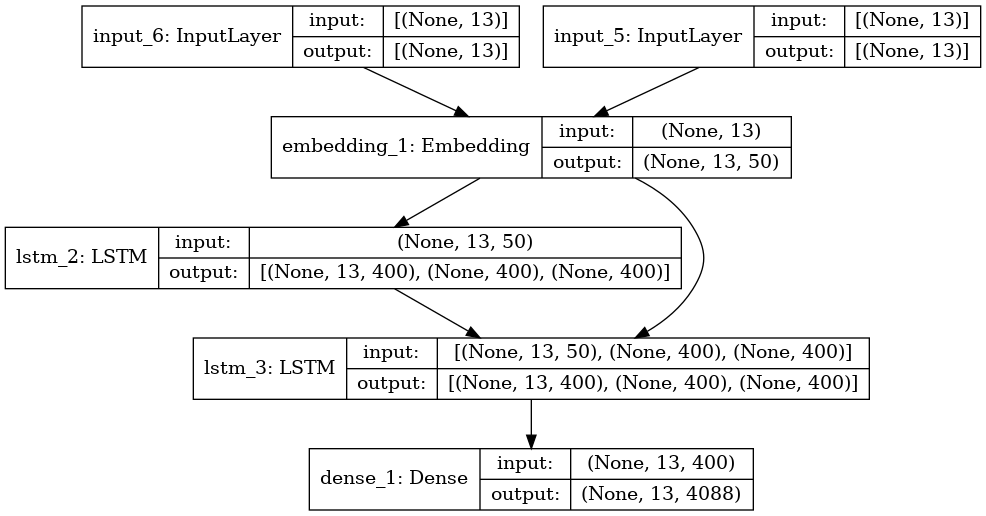

In [69]:
#plot model
tf.keras.utils.plot_model(model, to_file='./model.png', show_shapes=True)

### <font color="blue">**Model training**</font>

In [70]:
from keras.backend import clear_session
clear_session()

In [71]:
#model.fit([encoder_inp, decoder_inp],decoder_final_output,epochs=5 , batch_size=1024)
model.fit([encoder_inp, decoder_inp],decoder_final_output,epochs = 400 ,batch_size=1024)

2022-06-12 07:03:25.876425: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 6377280000 exceeds 10% of free system memory.
2022-06-12 07:03:33.178506: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 6377280000 exceeds 10% of free system memory.


Epoch 1/400
30/30 [==============================] - 8s 180ms/step - loss: 5.2316 - acc: 0.3826
Epoch 2/400
30/30 [==============================] - 5s 168ms/step - loss: 3.7445 - acc: 0.4047
Epoch 3/400
30/30 [==============================] - 5s 161ms/step - loss: 3.6936 - acc: 0.4082
Epoch 4/400
30/30 [==============================] - 5s 170ms/step - loss: 3.6490 - acc: 0.4123
Epoch 5/400
30/30 [==============================] - 5s 162ms/step - loss: 3.4851 - acc: 0.4203
Epoch 6/400
30/30 [==============================] - 5s 173ms/step - loss: 3.3135 - acc: 0.4734
Epoch 7/400
30/30 [==============================] - 5s 173ms/step - loss: 3.2053 - acc: 0.4800
Epoch 8/400
30/30 [==============================] - 5s 170ms/step - loss: 3.1865 - acc: 0.4801
Epoch 9/400
30/30 [==============================] - 5s 164ms/step - loss: 3.1691 - acc: 0.4812
Epoch 10/400
30/30 [==============================] - 5s 170ms/step - loss: 3.1454 - acc: 0.4854
Epoch 11/400
30/30 [===================

In [72]:
###---------------- save model ----------------###
model.save('./seq2seqChatbot.h5')

### <font color="blue">**Model inferencing to help in predicting translations of dialogue turns**</font>

In [73]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [74]:
#encoder inference model
enc_model = Model([enc_inp], enc_states)


decoder_state_input_h = Input(shape=(400,))
decoder_state_input_c = Input(shape=(400,))

decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]


decoder_outputs, state_h, state_c = dec_lstm(dec_embed , 
                                    initial_state=decoder_states_inputs)

decoder_states = [state_h, state_c]

# decoder inference Model
dec_model = Model([dec_inp]+ decoder_states_inputs,
                                      [decoder_outputs]+ decoder_states)

In [75]:
enc_model.save('./seq2seqChatbot_encoder.h5')
dec_model.save('./seq2seqChatbot_decoder.h5')

# <font color="blue">**Talk with chatbot**</font>

In [76]:
import numpy as np


from tensorflow.keras.preprocessing.sequence import pad_sequences
print("*****************************************************")
print("*              Chatbot Application                  *")
print("*****************************************************")


prepro1 = ""
while prepro1 != 'q':
    prepro1  = input("you : ")
    ## prepro1 = "Hello"

    prepro1 = clean_text(prepro1)
    ## prepro1 = "hello"

    prepro = [prepro1]
    ## prepro1 = ["hello"]

    txt = []
    for x in prepro:
        # x = "hello"
        lst = []
        for y in x.split():
            ## y = "hello"
            try:
                lst.append(vocab[y])
                ## vocab['hello'] = 454
            except:
                lst.append(vocab['<OUT>'])
        txt.append(lst)

    ## txt = [[454]]
    txt = pad_sequences(txt, 13, padding='post')

    ## txt = [[454,0,0,0,.........13]]

    stat = enc_model.predict( txt , verbose = 0)

    empty_target_seq = np.zeros( ( 1 , 1) )
     ##   empty_target_seq = [0]


    empty_target_seq[0, 0] = vocab['<SOS>']
    ##    empty_target_seq = [255]

    stop_condition = False
    decoded_translation = ''

    while not stop_condition :

        dec_outputs , h, c= dec_model.predict([ empty_target_seq] + stat , verbose = 0)
        decoder_concat_input = dense(dec_outputs)
        ## decoder_concat_input = [0.1, 0.2, .4, .0, ...............]

        sampled_word_index = np.argmax( decoder_concat_input[0, -1, :] )
        ## sampled_word_index = [2]

        sampled_word = inv_vocab[sampled_word_index] + ' '

        ## inv_vocab[2] = 'hi'
        ## sampled_word = 'hi '

        if sampled_word != '<EOS> ':
            decoded_translation += sampled_word  

        if sampled_word == '<EOS> ' or len(decoded_translation.split()) > 13:
            stop_condition = True 

        empty_target_seq = np.zeros( ( 1 , 1 ) )  
        empty_target_seq[ 0 , 0 ] = sampled_word_index
        ## <SOS> - > hi
        ## hi --> <EOS>
        stat = [h, c]  

    print(f"Bot : {decoded_translation}" if prepro1 != 'q' else "Bot : good bye!!"  )
    print("==============================================")  

*****************************************************
*              Chatbot Application                  *
*****************************************************


you :  hi


Bot : hi 


you :  hello


Bot : hey <OUT> 


you :  who are you


Bot : i am on a diet but thank you 


you :  how are you


Bot : head still secure to the neck 


you :  thats funny


Bot : right around 


you :  what do you do


Bot : i am a <OUT> i am doing i am the <OUT> 


you :  are you happy


Bot : i am sorry i am 


you :  I am sad


Bot : what are you talking about 


you :  I love yu


Bot : then let me see i forget a song a man like 


you :  i love you


Bot : you are not using it 


you :  I love you


Bot : you are not using it 


you :  help me please


Bot : what do you mean you can be can not get in 


you :  what day is it


Bot : i dont know tuesday 


you :  are you insane


Bot : i am sure i just wanted to 


you :  what is your favorite movie


Bot : <OUT> i have been there before i was just saying goodbye 


you :  what is your favorite song


Bot : i got that idea that since <OUT> as you 


you :  q


Bot : good bye!!
